In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_original = pd.read_csv('../../train.csv')

df = df_original.copy()
df.drop(['house_id'], axis=1, inplace=True)
df

,date,location,type,block,street,storey_range,area_sqm,flat_model,commence_date,price
0,2006-09,Raleigh,5 ROOM,107D,Agawan Court,07 TO 09,110.0,D,2003,313000.0
1,2007-06,Fresno,3 ROOM,678,Cleo St,07 TO 09,64.0,N,1988,167000.0
2,2010-09,Tucson,4 ROOM,5,E Pleasant View Way,10 TO 12,92.0,K,1976,430000.0
3,2007-04,Austin,4 ROOM,326,Park Hollow Ln,10 TO 12,92.0,K,1977,303800.0
4,2001-10,Honolulu,4 ROOM,794,Ala Puawa Place,04 TO 06,102.0,G,1998,212000.0
...,...,...,...,...,...,...,...,...,...,...
271716,2003-01,Omaha,4 ROOM,483,Sandra Ln,04 TO 06,103.0,G,1989,232000.0
271717,2000-11,Omaha,5 ROOM,615,Atkin Rd,10 TO 12,134.0,G,1996,428000.0
271718,2011-04,Boston,5 ROOM,390,Kempton Street,13 TO 15,118.0,D,2004,548888.0
271719,2010-09,Fresno,4 ROOM,968,Magnolia Dale Dr,13 TO 15,90.0,I,1999,360000.0


In [26]:
df['log_area_sqm'] = df['area_sqm'].apply(lambda x : np.log(x))


In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit_transform(df['storey_range'])

In [28]:
cat_columns = ['type', 'flat_model', 'location']

In [29]:
df = pd.get_dummies(df, columns=cat_columns, drop_first=True, dtype=int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   271721 non-null  object 
 1   block                  271721 non-null  object 
 2   street                 271721 non-null  object 
 3   storey_range           271721 non-null  object 
 4   area_sqm               271721 non-null  float64
 5   commence_date          271721 non-null  int64  
 6   price                  271721 non-null  float64
 7   log_area_sqm           271721 non-null  float64
 8   type_2 ROOM            271721 non-null  int64  
 9   type_3 ROOM            271721 non-null  int64  
 10  type_4 ROOM            271721 non-null  int64  
 11  type_5 ROOM            271721 non-null  int64  
 12  type_EXECUTIVE         271721 non-null  int64  
 13  type_MULTI-GENERATION  271721 non-null  int64  
 14  flat_model_B           271721 non-nu

In [31]:
df

,date,block,street,storey_range,area_sqm,commence_date,price,log_area_sqm,type_2 ROOM,type_3 ROOM,...,location_Omaha,location_Pittsburgh,location_Portland,location_Raleigh,location_Riverside,location_Sacramento,location_Seatle,location_Tampa,location_Tucson,location_Washington
0,2006-09,107D,Agawan Court,07 TO 09,110.0,2003,313000.0,4.700480,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2007-06,678,Cleo St,07 TO 09,64.0,1988,167000.0,4.158883,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2010-09,5,E Pleasant View Way,10 TO 12,92.0,1976,430000.0,4.521789,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2007-04,326,Park Hollow Ln,10 TO 12,92.0,1977,303800.0,4.521789,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001-10,794,Ala Puawa Place,04 TO 06,102.0,1998,212000.0,4.624973,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271716,2003-01,483,Sandra Ln,04 TO 06,103.0,1989,232000.0,4.634729,0,0,...,1,0,0,0,0,0,0,0,0,0
271717,2000-11,615,Atkin Rd,10 TO 12,134.0,1996,428000.0,4.897840,0,0,...,1,0,0,0,0,0,0,0,0,0
271718,2011-04,390,Kempton Street,13 TO 15,118.0,2004,548888.0,4.770685,0,0,...,0,0,0,0,0,0,0,0,0,0
271719,2010-09,968,Magnolia Dale Dr,13 TO 15,90.0,1999,360000.0,4.499810,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.columns

Index(['date', 'block', 'street', 'storey_range', 'area_sqm', 'commence_date',
       'price', 'log_area_sqm', 'type_2 ROOM', 'type_3 ROOM', 'type_4 ROOM',
       'type_5 ROOM', 'type_EXECUTIVE', 'type_MULTI-GENERATION',
       'flat_model_B', 'flat_model_C', 'flat_model_D', 'flat_model_E',
       'flat_model_F', 'flat_model_G', 'flat_model_H', 'flat_model_I',
       'flat_model_J', 'flat_model_K', 'flat_model_L', 'flat_model_M',
       'flat_model_N', 'flat_model_O', 'flat_model_P', 'location_Arlington',
       'location_Atlanta', 'location_Austin', 'location_Baltimore',
       'location_Boston', 'location_Chicago', 'location_Cleveland',
       'location_Denver', 'location_Fresno', 'location_Honolulu',
       'location_Mesa', 'location_Miami', 'location_Milwaukee',
       'location_Minneapolis', 'location_Oakland', 'location_Omaha',
       'location_Pittsburgh', 'location_Portland', 'location_Raleigh',
       'location_Riverside', 'location_Sacramento', 'location_Seatle',
       'loca

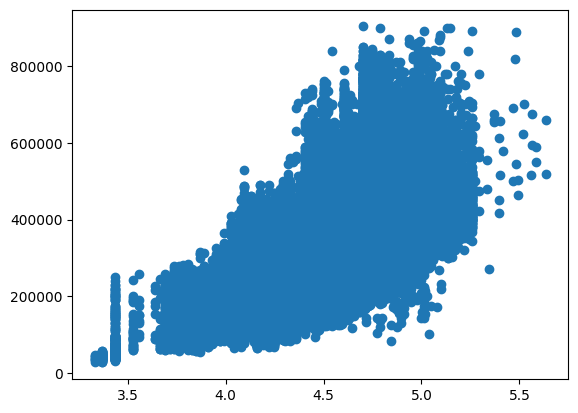

In [33]:
plt.scatter(x=df['log_area_sqm'], y=df['price'])

In [37]:
df['year_of_sale'] = df['date'].apply(lambda x: int(x[:4]))
df['month_of_sale'] = df['date'].apply(lambda x: int(x.strip()[5:]))

In [44]:
df.drop(['block', 'street', 'storey_range', 'date'], axis=1, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271721 entries, 0 to 271720
Data columns (total 52 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   area_sqm               271721 non-null  float64
 1   commence_date          271721 non-null  int64  
 2   price                  271721 non-null  float64
 3   log_area_sqm           271721 non-null  float64
 4   type_2 ROOM            271721 non-null  int64  
 5   type_3 ROOM            271721 non-null  int64  
 6   type_4 ROOM            271721 non-null  int64  
 7   type_5 ROOM            271721 non-null  int64  
 8   type_EXECUTIVE         271721 non-null  int64  
 9   type_MULTI-GENERATION  271721 non-null  int64  
 10  flat_model_B           271721 non-null  int64  
 11  flat_model_C           271721 non-null  int64  
 12  flat_model_D           271721 non-null  int64  
 13  flat_model_E           271721 non-null  int64  
 14  flat_model_F           271721 non-nu

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_val,y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
yval_preds = linreg.predict(X_val)

In [50]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, yval_preds)
mae

39051.22487986961